In [ ]:
#ЗАВДАННЯ 1:   Завдання щодо генерації текстів або машинного перекладу (на вибір) на базі рекурентних мереж або трансформерів (на вибір)
# Вибір пав на генерацію тексту

In [6]:
from transformers import pipeline
import os
import re

os.environ["TRANSFORMERS_NO_TF"] = "1"
os.environ["TRANSFORMERS_NO_FLAX"] = "1"


In [3]:
DATA_DIR = "data/ukrainian-texts"
FILE_NAME = "Franko_-Zibrannya-tvoriv-u-p-yatdesyati-tomah-literaturno-kritichni-praci-1900-1902-tom-33-.382254.txt"

file_path = os.path.join(DATA_DIR, FILE_NAME)

with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Символів у файлі:", len(raw_text))
print(raw_text[:500])



Символів у файлі: 1055876
﻿   ІВАН ФРАНКО
   АКАДЕМІЯ НАУК УКРАЇНСЬКОЇ РСР
   ІНСТИТУТ ЛІТЕРАТУРИ ім. Т. Г. ШЕВЧЕНКА
 Іван Франко Зібрання творів у п’ятдесяти томах 
 літературно-критичні праці (1900—1902) том 33
   
   ВИДАВНИЦТВО «НАУКОВА ДУМКА» КИЇВ—1982
   Редакційна колегія:
   М* Д> Бернштейн Г* Д* Вервес Л. Т% Гордієнко О. /. Дей
   Б * А І Деркач (заступник голови)
   /. ОІ Дзеверін
   ВІ ЮІ Євдокименко
   О. 6І Засенко
   Д. ВІ Затонський
   С. Д* Зубков
   6. ПІ Кирилюк (голова)
   П. ЙІ Колесник Н, б* Крутіков


In [7]:

def clean_text(text):
    
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[A-ZА-ЯІЇЄҐ]{3,}", "", text)
    text = re.sub(r"[^а-яА-ЯіїєґІЇЄҐ.,;:!?\"\'\-\s]", "", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    return text.strip()


text = clean_text(raw_text)
print(text[:500])


ім. Т. Г. Іван Франко Зібрання творів у пятдесяти томах літературно-критичні праці том Редакційна колегія: М Д Бернштейн Г Д Вервес Л. Т Гордієнко О. . Дей Б А І Деркач заступник голови . ОІ Дзеверін ВІ ЮІ Євдокименко О. І Засенко Д. ВІ Затонський С. Д Зубков . ПІ Кирилюк голова П. ЙІ Колесник Н, б Крутікова Ф. . Лось В. Л. Микитась Ф. Я. Погребенник відповідальний секретар Є. СІ Шабліовський МІ Т. Дценко Редактор тому ПІ ЙІ Колесник Упорядкування та коментарі Н. О, Вишневської та НІ І. Чорної Р


In [19]:
paragraphs = re.split(r"\n{1,}", raw_text)
paragraphs = [clean_text(p) for p in paragraphs if len(p.strip()) > 50]

print("Кількість абзаців:", len(paragraphs))

# Візьмемо 3 підряд абзаци
num_paragraphs = 3
start_index = 10
prompt = " ".join(paragraphs[start_index:start_index+num_paragraphs])


prompt = prompt[:500] 

print("PROMPT довжиною:", len(prompt))
print("\n", prompt)  



Кількість абзаців: 2588
PROMPT довжиною: 500

 Жвавий літературний рух, що розпочався в ювілейному , спостерігався також і в році. Це було не лише раптове відродження, а й справжній початок інтенсивного духовного життя всього українського народу в Галичині І в Російській імперії. Сміливо можна сказати, що р. було видано і розпродано українських книжок більше, ніж до цього і навіть протягом цілого десятиліття. Основним центром літературної і наукової праці було Наукове товариство імені Шевченка у Львові. У Літературно-науковому віснику, який 


In [16]:
#ніціалізація моделі (Transformer)
generator = pipeline(
    task="text-generation",
    model="ai-forever/mGPT",
    framework="pt"
)

Device set to use cpu


In [20]:
generated = generator(
    prompt,
    max_length=400,
    do_sample=True,
    temperature=0.7,
    top_p=0.9,
    repetition_penalty=1.2
)

print("\n ЗГЕНЕРОВАНИЙ ТЕКСТ:\n")
print(generated[0]["generated_text"])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=400) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



 ЗГЕНЕРОВАНИЙ ТЕКСТ:

Жвавий літературний рух, що розпочався в ювілейному , спостерігався також і в році. Це було не лише раптове відродження, а й справжній початок інтенсивного духовного життя всього українського народу в Галичині І в Російській імперії. Сміливо можна сказати, що р. було видано і розпродано українських книжок більше, ніж до цього і навіть протягом цілого десятиліття. Основним центром літературної і наукової праці було Наукове товариство імені Шевченка у Львові. У Літературно-науковому віснику, який є першим збереженим словником поетичних творів письменника та заснован ним Товариством (з 14 червя 1864р.), зазначено: «Усе нашестя талановито написаних статей про дар Духа Святого через те теж повинне виникнути...»
На козацькому подвиг воювали сотники Кирила Букринчики («Тутань», 1863), Дмитро Платонов(«Степова молодиця») — Сотникова дружина Василя Симоненка; Петру Гнатюкевичам надходило безліч нових листівок приватними особами України, Словачини тощо [15]. Такими чудовис

In [ ]:
#ЗАВДАННЯ 2: стилізаціЯ зображень

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import copy

# Встановлюємо device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [47]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert('RGB')   

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    if shape is not None:
        size = shape
    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))])
    
    image = in_transform(image).unsqueeze(0)
    return image.to(device)


content_path = "my_photo.jpg"  
style_path = "Style.jpg"      

content = load_image(content_path)
style = load_image(style_path, shape=content.shape[-2:])


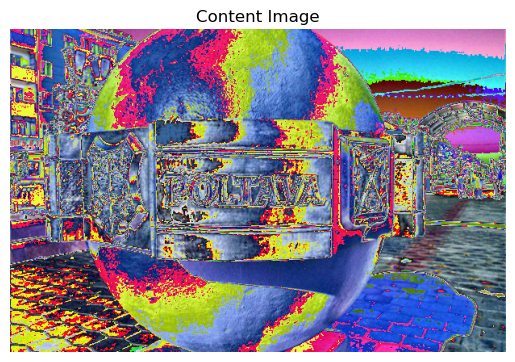

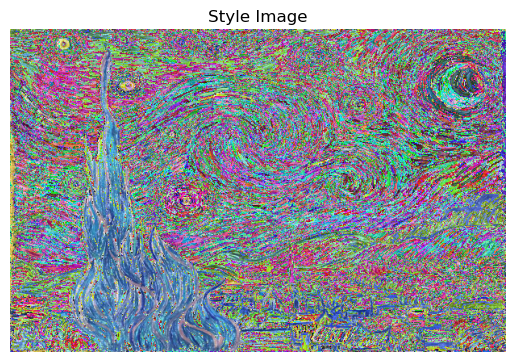

In [48]:
def imshow(tensor, title=None):
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

imshow(content, "Content Image")
imshow(style, "Style Image")


In [49]:
# Використовуємо попередньо натреновану VGG19
vgg = models.vgg19(pretrained=True).features.to(device).eval()

# Не тренуємо VGG
for param in vgg.parameters():
    param.requires_grad_(False)

# Шари, які будемо використовувати
content_layers = ['conv4_2']  # для контенту
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']  # для стилю


D:\conda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\conda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\User/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth


100%|███████████████████████████████████████████████████████████████████████████████| 548M/548M [00:53<00:00, 10.7MB/s]


In [53]:
def get_features(image, model, content_layers, style_layers):
    features = {}
    x = image
    # Список шарів для NST
    layer_names = {
        '0': 'conv1_1',
        '5': 'conv2_1',
        '10': 'conv3_1',
        '19': 'conv4_1',
        '21': 'conv4_2',  
        '28': 'conv5_1'
    }

    for name, layer in model._modules.items():
        x = layer(x)
        if name in layer_names:
            features[layer_names[name]] = x
    return features

# Грам-матриця для стилю
def gram_matrix(tensor):
    _, n_filters, h, w = tensor.size()
    tensor = tensor.view(n_filters, h*w)
    gram = torch.mm(tensor, tensor.t())
    return gram


In [54]:
content_layers = ['conv4_2']
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']

content_features = get_features(content, vgg, content_layers, style_layers)
style_features = get_features(style, vgg, content_layers, style_layers)
# Обчислюємо грам-матриці для стилю
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# Ініціалізуємо цільове зображення як копію content
target = content.clone().requires_grad_(True).to(device)

# Параметри оптимізації
optimizer = optim.Adam([target], lr=0.003)
style_weight = 1e6
content_weight = 1


In [58]:
steps = 100

for i in range(steps):
    target_features = get_features(target, vgg, content_layers, style_layers)
    # Контент
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    # Стиль
    style_loss = 0
    for layer in style_layers:
        target_gram = gram_matrix(target_features[layer])
        style_gram = style_grams[layer]
        layer_loss = torch.mean((target_gram - style_gram)**2)
        style_loss += layer_loss / len(style_layers)  
    total_loss = content_weight * content_loss + style_weight * style_loss
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    if i % 50 == 0:
        print(f"Step {i}, Total loss: {total_loss.item()}")



Step 0, Total loss: 30390901276672.0
Step 50, Total loss: 19930130939904.0


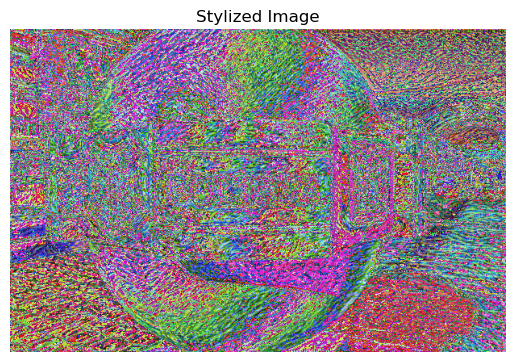

In [59]:
imshow(target, "Stylized Image")

In [ ]:
#Завдання номер 3: 

In [ ]:
# 3.б) Знайдіть українські мовні моделі, наведіть приклади роботи з ними (через pipeline) на завданнях
#(zero-shot-classification, summarization, translation)

In [23]:
from transformers import pipeline


# 1. ZERO-SHOT CLASSIFICATION

print("\n=== ZERO-SHOT CLASSIFICATION ===")

zero_shot_classifier = pipeline(
    task="zero-shot-classification",
    model="facebook/bart-large-mnli"
)

#Текст взятий з твітеру трампа
text_uk = "АМЕРИКА ПОВЕРТАЄТЬСЯ. Кожного дня я буду боротися за тебе кожним подихом свого тіла. Я не заспокоюся, доки ми не створимо сильну, безпечну та процвітаючу Америку, на яку заслуговують наші діти та на яку заслуговуєте ви. Це справді буде золотий вік Америки.."
labels = ["технології", "спорт", "політика", "освіта"]

result_zs = zero_shot_classifier(
    text_uk,
    candidate_labels=labels
)

print("Текст:", text_uk)
print("Результат класифікації:")
for label, score in zip(result_zs["labels"], result_zs["scores"]):
    print(f"{label}: {score:.4f}")



=== ZERO-SHOT CLASSIFICATION ===



Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Текст: АМЕРИКА ПОВЕРТАЄТЬСЯ. Кожного дня я буду боротися за тебе кожним подихом свого тіла. Я не заспокоюся, доки ми не створимо сильну, безпечну та процвітаючу Америку, на яку заслуговують наші діти та на яку заслуговуєте ви. Це справді буде золотий вік Америки..
Результат класифікації:
політика: 0.4977
технології: 0.2572
освіта: 0.1541
спорт: 0.0910


In [24]:

# 2. SUMMARIZATION (українська модель)

print("\n=== SUMMARIZATION ===")

summarizer = pipeline(
    task="summarization",
    model="d0p3/ukr-t5-small",
    tokenizer="d0p3/ukr-t5-small"
)

long_text_uk = """
Доповідь міністра закордонних справ України Андрія Сибіги. Обговорили результати нашої дипломатичної роботи у 2025 році та основні завдання на цей рік. 
Головне – щоб кожна домовленість в інтересах України, кожна угода, кожне партнерство працювали на сто відсотків.
Також говорили про ротації в дипломатичному корпусі – найближчий часом міністр представить відповідні кандидатури. 
Враховуючи необхідність незмінно результативної роботи МЗС України, буде обрано і кандидатуру нового першого заступника міністра закордонних справ. 
Очікую пропозицій для рішення. Слава Україні!

"""

summary = summarizer(
    long_text_uk,
    max_length=50,
    min_length=20,
    do_sample=False
)

print("Оригінальний текст:")
print(long_text_uk)
print("\nРезюме:")
print(summary[0]["summary_text"])



=== SUMMARIZATION ===


config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

D:\conda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--d0p3--ukr-t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance,

model.safetensors:   0%|          | 0.00/299M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/833 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/805k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/416 [00:00<?, ?B/s]

D:\conda\Lib\site-packages\transformers\convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Оригінальний текст:

Доповідь міністра закордонних справ України Андрія Сибіги. Обговорили результати нашої дипломатичної роботи у 2025 році та основні завдання на цей рік. 
Головне – щоб кожна домовленість в інтересах України, кожна угода, кожне партнерство працювали на сто відсотків.
Також говорили про ротації в дипломатичному корпусі – найближчий часом міністр представить відповідні кандидатури. 
Враховуючи необхідність незмінно результативної роботи МЗС України, буде обрано і кандидатуру нового першого заступника міністра закордонних справ. 
Очікую пропозицій для рішення. Слава Україні!



Резюме:
<extra_id_0> міністра закордонних справ України Андрій Сибіги. Новини України. Новини


In [25]:
# ======================================================
# 3. TRANSLATION (українська → англійська)
# ======================================================
print("\n=== TRANSLATION ===")


translator = pipeline(
    task="translation_uk_to_en",
    model="Helsinki-NLP/opus-mt-uk-en"
)

sentence_uk = "Захисники Маріуполя виконали наказ, не зважаючи на всі труднощі, 82 дні відтягували переважаючі сили противника на себе та дали змогу українській армії перегрупуватися"

translation = translator(sentence_uk)

print("Український текст:")
print(sentence_uk)

print("\nПереклад англійською:")
print(translation[0]["translation_text"])


=== TRANSLATION ===


config.json: 0.00B [00:00, ?B/s]

D:\conda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-uk-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better per

pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


source.spm:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

D:\conda\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Український текст:
Захисники Маріуполя виконали наказ, не зважаючи на всі труднощі, 82 дні відтягували переважаючі сили противника на себе та дали змогу українській армії перегрупуватися

Переклад англійською:
In spite of all the difficulties, for 82 days, the defenders of MariPoll pulled the overwhelming forces of the enemy back and allowed the Ukrainian army to regroup.


In [ ]:
#3.c) Генерація зображень з Hugging Face Diffusers, зробіть задачу Text-to-Image або Image-to-Image або Inpainting (заміна частини зображення по масці) 
#за допомогою pipeline

In [19]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

D:\conda\Lib\site-packages\torch\amp\autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


D:\conda\Lib\site-packages\torch\amp\autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

D:\conda\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/30 [00:00<?, ?it/s]

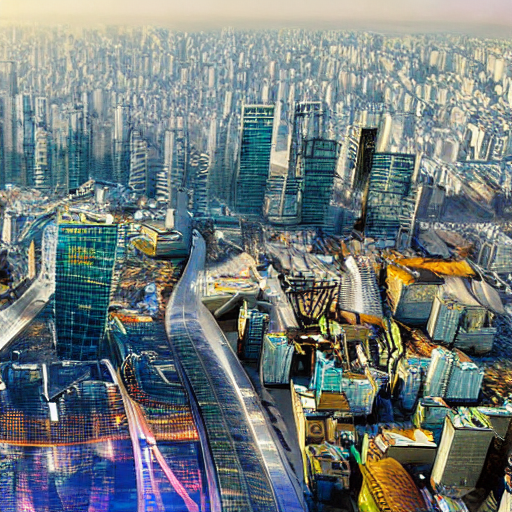

Зображення збережено 


In [26]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import display   


model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)

# Text-to-Image
# Задаємо потрібний нам промпт для генерації зображення
prompt = "Futuristic Kyiv city in 200 years, cinematic, ultra detailed"

image = pipe(
    prompt=prompt,
    num_inference_steps=30,
    guidance_scale=7.5
).images[0]

display(image) 
# Збереження результату
image.save("Kyiv.png")
print("Зображення збережено ")
